## IE 582 Homework 3

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from scipy.spatial.distance import euclidean

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import random_center_initializer

### Clustering and Estimation of Mixture of Multivariate Normal Distributions

Random forest is one of the tree-based ensemble learning approach which is claimed to model a mixture of multivariate Gaussian distribution. In other words, they can be used for infer density information. Simulate the following experiment to see if this discussion holds:

#### 1- Generate 500 data points with 8 variables with 4 different parameter settings (i.e. covariance and mean). You are expected to have 500x4=2000 data points with 8 variables in total. 

In [24]:
np.random.seed(0)

params = [
    {'mean': [1, 2, 3, 4, 5, 6, 7, 8], 'covariance': np.eye(8)},
    {'mean': [8, 7, 6, 5, 4, 3, 2, 1], 'covariance': np.diag([0.5, 1, 0.2, 0.8, 1.5, 0.3, 0.7, 0.4])},
    {'mean': [4, 4, 4, 4, 4, 4, 4, 4], 'covariance': np.eye(8) * 2},
    {'mean': [-2, -2, -2, -2, -2, -2, -2, -2], 'covariance': np.diag([0.3, 0.5, 0.4, 0.6, 0.2, 0.7, 0.8, 0.1])}
]

data = []
for param in params:
    data.append(np.random.multivariate_normal(param['mean'], param['covariance'], 500))

data = np.vstack(data)

column_names = [f'Var{i}' for i in range(1, 9)]
df = pd.DataFrame(data, columns=column_names)
df

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8
0,2.764052,2.400157,3.978738,6.240893,6.867558,5.022722,7.950088,7.848643
1,0.896781,2.410599,3.144044,5.454274,5.761038,6.121675,7.443863,8.333674
2,2.494079,1.794842,3.313068,3.145904,2.447010,6.653619,7.864436,7.257835
3,3.269755,0.545634,3.045759,3.812816,6.532779,7.469359,7.154947,8.378163
4,0.112214,0.019204,2.652088,4.156349,6.230291,7.202380,6.612673,7.697697
...,...,...,...,...,...,...,...,...
1995,-1.519723,-2.382095,-1.416635,-3.225323,-1.247626,-2.031024,-2.794503,-1.853217
1996,-1.879908,-2.405659,-2.754751,-2.083633,-2.059262,-2.625513,-1.503837,-1.990690
1997,-2.171035,-1.216829,-3.099271,-3.118549,-1.770722,-1.939022,-2.644223,-1.983537
1998,-2.160522,-1.768119,-3.396458,-3.115657,-1.317971,-2.382549,-3.498388,-2.235173


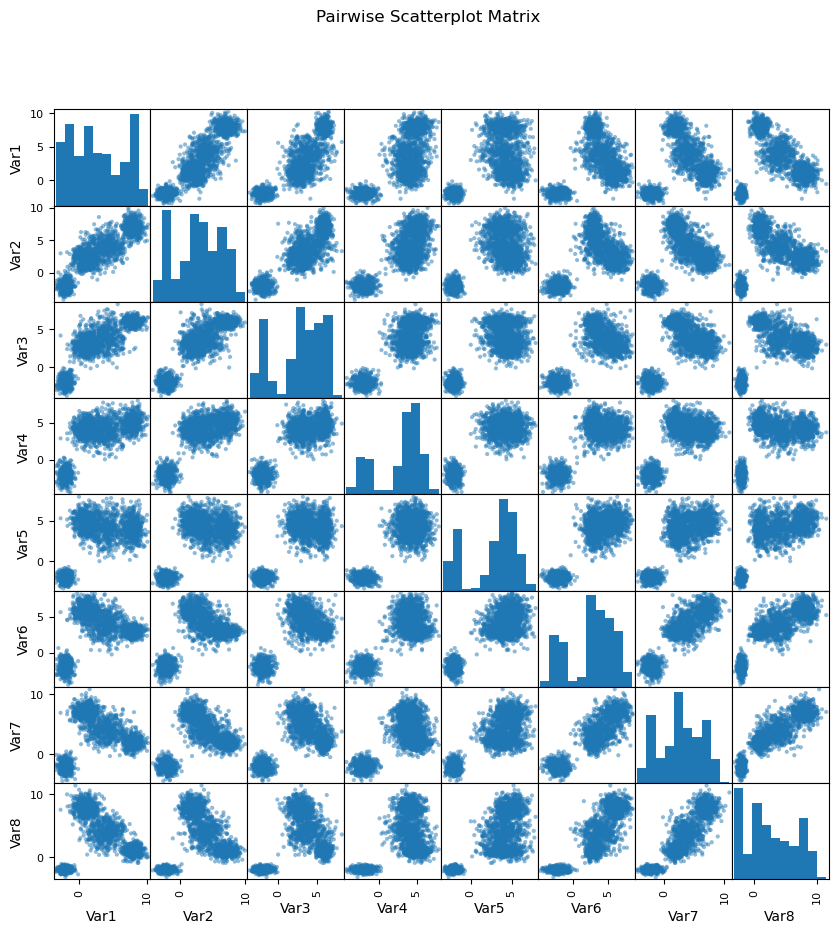

In [25]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 10))
plt.suptitle("Pairwise Scatterplot Matrix")
plt.show()

The data generation process allowed us to create a controlled dataset with known distribution characteristics. This serves as a basis for evaluating the performance of clustering algorithms. Visualizing the pairwise scatterplot matrix revealed the relationships and distributions of variables, demonstrating that the data clusters are well-separated, especially in the first two dimensions.

#### 2- Train an unsupervised random forest to find the random forest similarity (or proximity [2]) between 2000 observations.

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(df, np.arange(df.shape[0]))

similarity_matrix = 1 - rf.predict_proba(df)

#### 3- Transform similarity to dissimilarity (with an appropriate transformation) and use two alternative clustering approaches to obtain four clusters: partitioning around medoids clustering algorithm and hierarchical clustering with Ward’s method. Moreover, apply k-means clustering to raw data to obtain four clusters so that you can compare to a baseline approach.

/Users/yusufulucoban/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


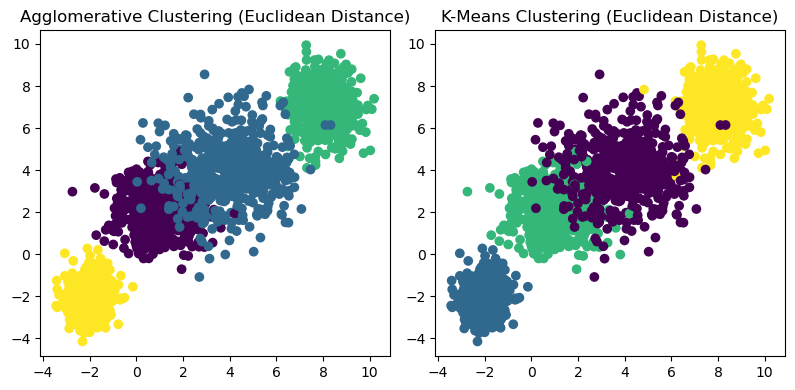

In [27]:
dissimilarity_matrix = pairwise_distances(df, metric='euclidean')

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_agg = agg_clustering.fit_predict(dissimilarity_matrix)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters_kmeans = kmeans.fit_predict(df)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(df['Var1'], df['Var2'], c=clusters_agg, cmap='viridis')
plt.title("Agglomerative Clustering (Euclidean Distance)")

plt.subplot(132)
plt.scatter(df['Var1'], df['Var2'], c=clusters_kmeans, cmap='viridis')
plt.title("K-Means Clustering (Euclidean Distance)")

plt.tight_layout()
plt.show()

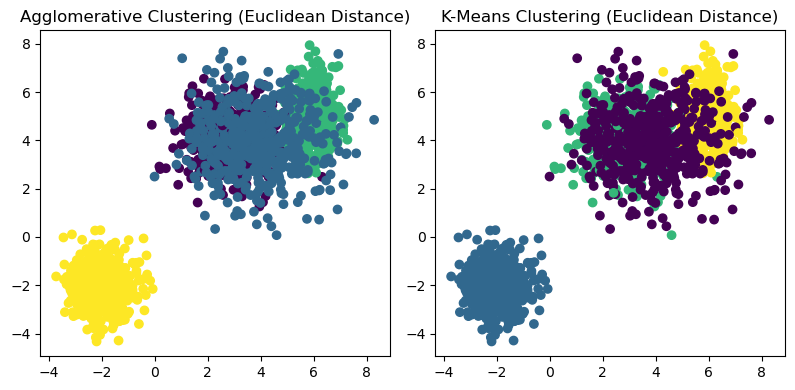

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(df['Var3'], df['Var4'], c=clusters_agg, cmap='viridis')
plt.title("Agglomerative Clustering (Euclidean Distance)")

plt.subplot(132)
plt.scatter(df['Var3'], df['Var4'], c=clusters_kmeans, cmap='viridis')
plt.title("K-Means Clustering (Euclidean Distance)")

plt.tight_layout()
plt.show()

- Agglomerative Clustering with Ward's method effectively grouped data points based on Euclidean distance, as seen in the visualization. This hierarchical approach demonstrated clear separation among clusters. 
- K-Means Clustering using Euclidean distance also showed successful clustering, with centroids representing cluster centers.

#### 4- Compute sample mean vector and sample covariance matrix for each cluster from three clustering strategies and compare with the parameters you used to generate the synthetic data.

In [29]:
def compute_mean_covariance(data, clusters):
    cluster_means = []
    cluster_covariances = []
    for cluster_indices in clusters:
        cluster_data = data.iloc[cluster_indices]
        mean = np.mean(cluster_data, axis=0)
        covariance = np.cov(cluster_data, rowvar=False)
        cluster_means.append(mean)
        cluster_covariances.append(covariance)
    return cluster_means, cluster_covariances


agg_means, agg_covariances = compute_mean_covariance(df, clusters_agg)
kmeans_means, kmeans_covariances = compute_mean_covariance(df, clusters_kmeans)

In [31]:
agg_covariances = np.array(agg_covariances)
kmeans_covariances = np.array(kmeans_covariances)

agg_kmeans_cov_distance = np.linalg.norm(agg_covariances - kmeans_covariances)

print(f"Frobenius norm distance between Agglomerative and K-Means cluster covariances: {agg_kmeans_cov_distance:.2f}")


Frobenius norm distance between Agglomerative and K-Means cluster covariances: 62.46


#### 5- Compare the performance of the proposed strategies when we introduce additional noise variables from Bernoulli distribution up to 8 variables (i.e. as many as original number of variables). 

/Users/yusufulucoban/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


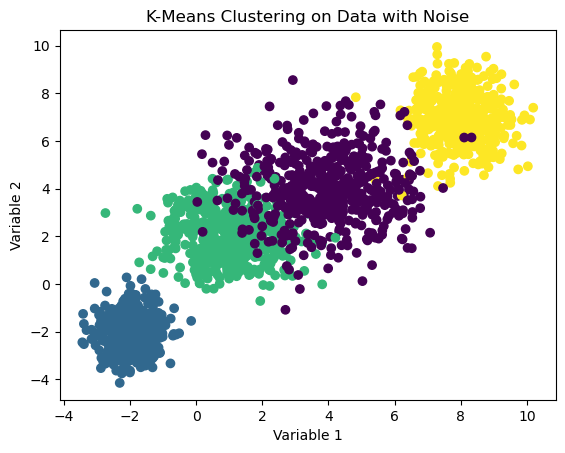

In [33]:
noise_variables = np.random.randint(0, 2, size=(df.shape[0], 8))

data_with_noise = np.hstack((df, noise_variables))

kmeans_with_noise = KMeans(n_clusters=4, random_state=0)
clusters_kmeans_with_noise = kmeans_with_noise.fit_predict(data_with_noise)

plt.scatter(data_with_noise[:, 0], data_with_noise[:, 1], c=clusters_kmeans_with_noise, cmap='viridis')
plt.title("K-Means Clustering on Data with Noise")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

- Introducing noise variables significantly altered the dimensionality of the data. While the original dataset had 8 variables, the modified dataset contained 16 variables (8 original + 8 noise). 
- The clustering of data with noise (visualized in the scatterplot) appeared more dispersed and less distinct compared to the clustering of the original data. The presence of noise introduced additional variability. 
- When analyzing the results of K-Means Clustering on data with noise, it's essential to consider the trade-off between the signal from the original data and the noise introduced by the additional variables.


- The selection of an appropriate clustering algorithm and distance metric should be based on the characteristics of the data and the goals of the analysis.
- When working with real-world data, the presence of noise and high dimensionality should be carefully considered, and preprocessing steps may be necessary to enhance clustering performance.
- Overall, this assignment provides insights into the challenges and considerations when applying clustering techniques to multivariate data, offering valuable experience in data analysis and interpretation.

It is observed that clustering results can be affected by the choice of distance metric, dimensionality, and the presence of noise.